In [1]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as py
import statsmodels as stat
import plotly as plot


In [2]:
# Loading the bank customer information 
file_path = '/kaggle/input/bank-customer-information-and-marketing-response/bank.csv'
data = pd.read_csv(file_path)

In [3]:
# Summary statistics of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [4]:
# summary cont.
print(data.describe())


               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [5]:
print(data.head())  # First 5 rows
print(data.tail())  # Last 5 rows


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
      age            job  marital  education default  balance housing loan  \
4516   33       services  married

In [6]:
# Finding unique values
print(data.nunique())


age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [7]:
# Checking for missing values 
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**Observation:**
We can see that our dataset is pretty clean as we dont need to treat any null values before proceeding with out preliminary EDA.

# **Outlier Detection & Treatment**

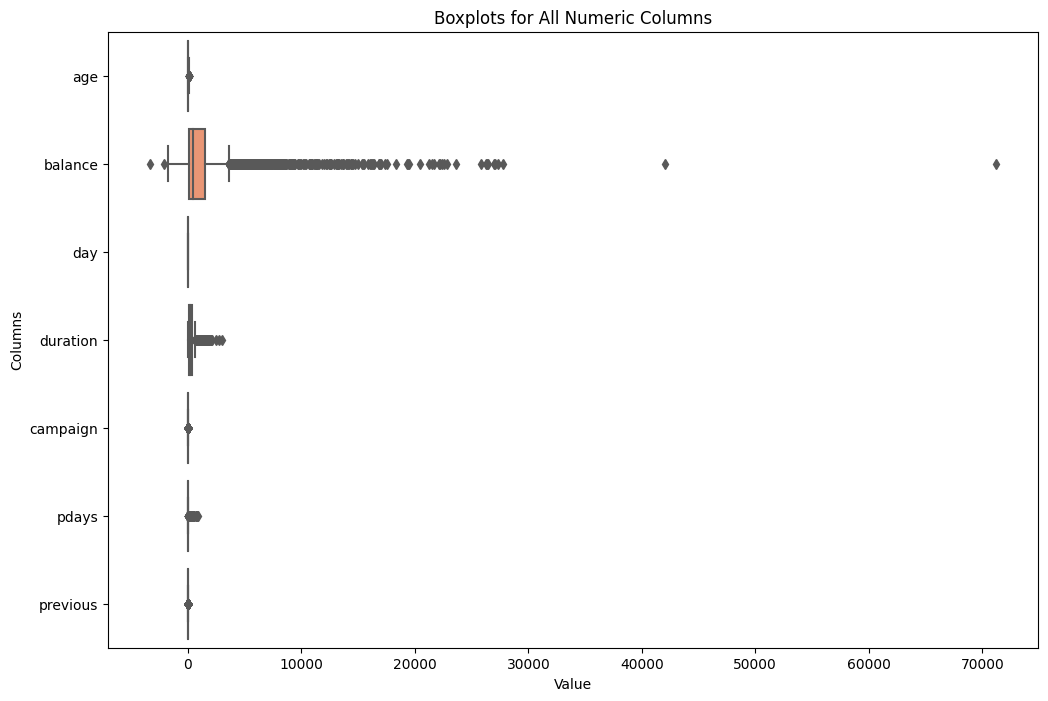

In [8]:
# Using visulisations such as boxplot to easily identify outliers

numeric_data = data.select_dtypes(include=[np.number])  # This selects only numeric columns

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size of the figure as necessary
sns.boxplot(data=numeric_data, orient="h", palette="Set2")  # Horizontal boxplots
plt.title('Boxplots for All Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()


**Observation:**
Here we can notice that there is significant number of outliers in the balance column. Therefore we will treat these outliers to ensure we have a good model accuracy.

In [9]:
# Using IQR Method
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data_cleaned = data[(data['balance'] >= lower_bound)
                    & (data['balance'] <= upper_bound)]


We will use the IQR method to remove / drop all the outliers that are not within the upper and lower quartile.


Text(0, 0.5, 'Values')

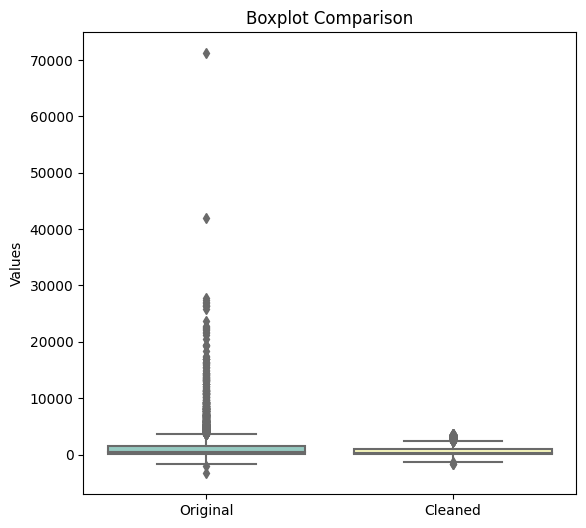

In [10]:
# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Boxplot comparison
plt.subplot(1, 2, 1)
sns.boxplot(data=[data['balance'], data_cleaned['balance']], palette="Set3")
plt.title('Boxplot Comparison')
plt.xticks([0, 1], ['Original', 'Cleaned'])
plt.ylabel('Values')

# **EDA**

# Uni-variate Visualisations

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


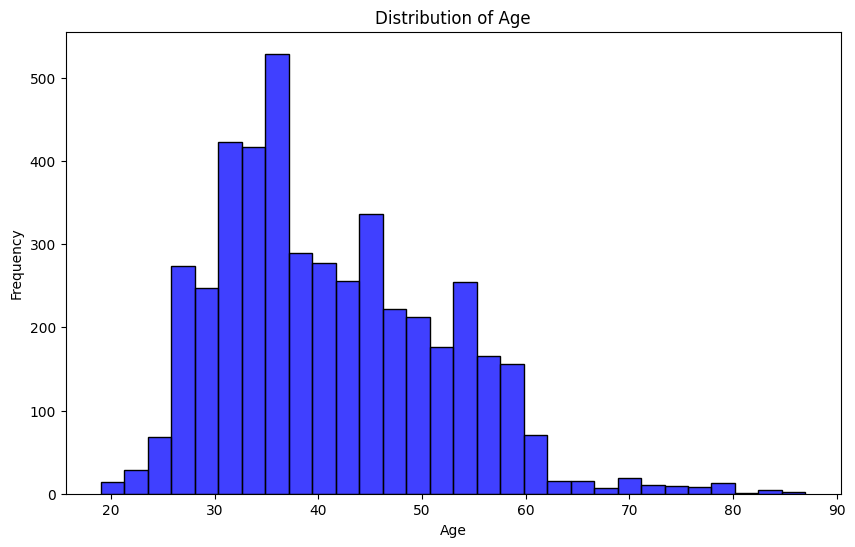

In [11]:
# Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=False, color='blue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


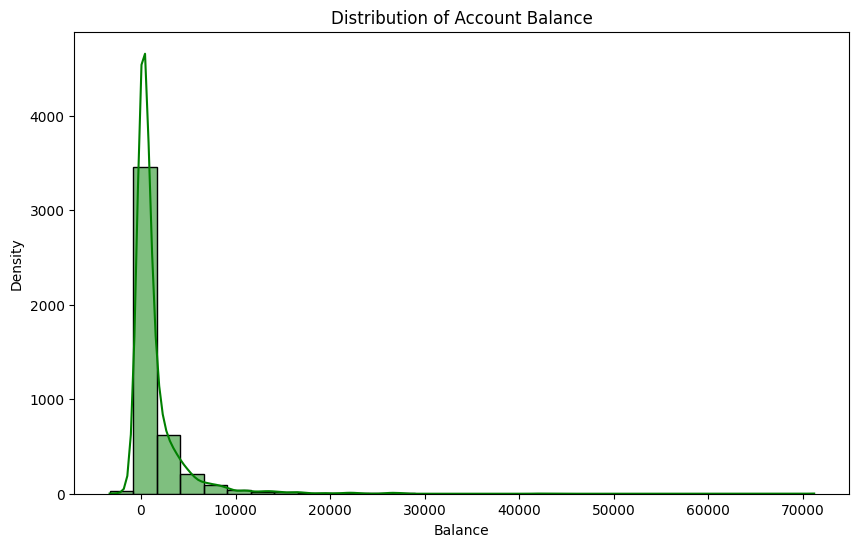

In [12]:
#Balance
plt.figure(figsize=(10, 6))
sns.histplot(data['balance'], kde=True, color='green', bins=30)  # KDE for a smooth density estimate
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

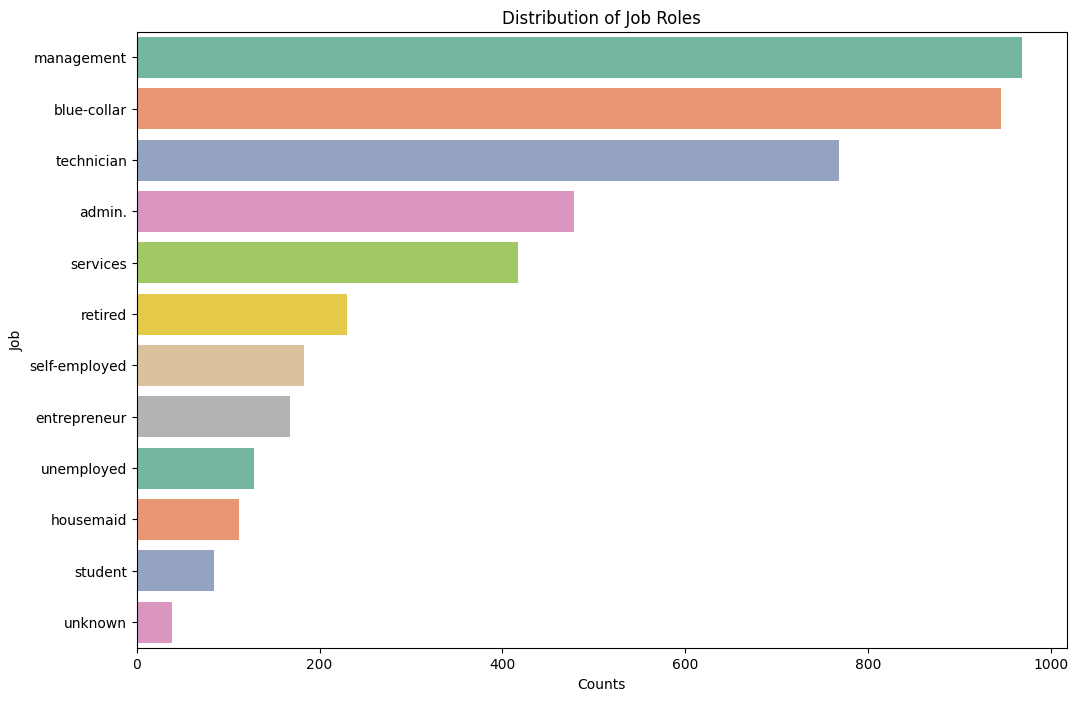

In [13]:
#Jobs
plt.figure(figsize=(12, 8))
sns.countplot(y='job', data=data, palette='Set2', order = data['job'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xlabel('Counts')
plt.ylabel('Job')
plt.show()

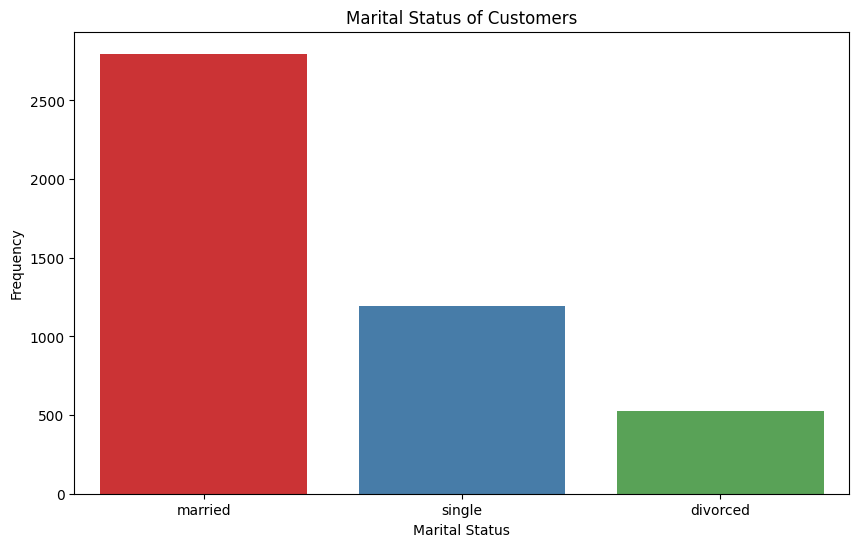

In [14]:
# Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=data, palette='Set1', order = data['marital'].value_counts().index)
plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

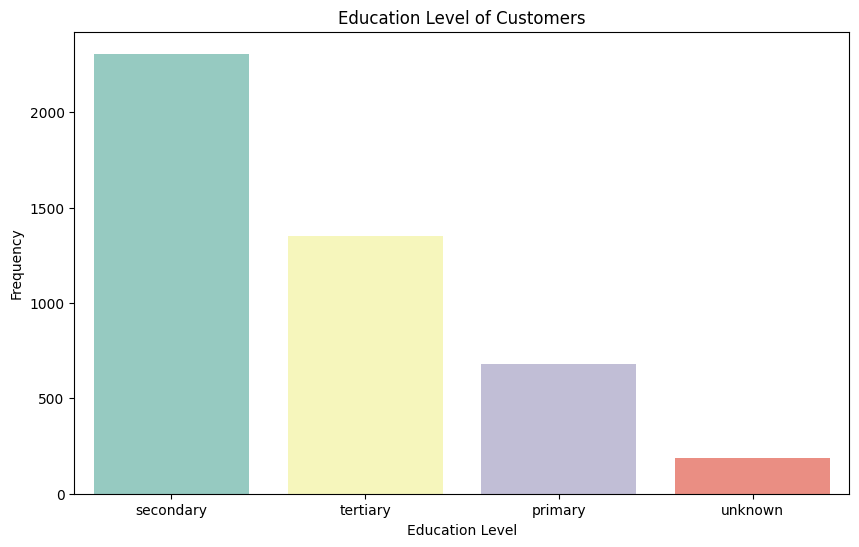

In [15]:
# Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=data, palette='Set3', order = data['education'].value_counts().index)
plt.title('Education Level of Customers')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

Let's Create some Features to get some good insights

In [16]:
# Age binning to better capture trends
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])


/tmp/ipykernel_33/3377866095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])


In [17]:
# Age group interactions based on job
data_cleaned['age_job_interaction'] = data_cleaned['age'].apply(lambda x: 'young' if x < 30 else 'old') + '_' + data_cleaned['job']


/tmp/ipykernel_33/472883174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_job_interaction'] = data_cleaned['age'].apply(lambda x: 'young' if x < 30 else 'old') + '_' + data_cleaned['job']


In [18]:
# Account balance levels 
data_cleaned['balance_level'] = pd.qcut(data_cleaned['balance'], q=3, labels=['low', 'medium', 'high'])


/tmp/ipykernel_33/1208909183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['balance_level'] = pd.qcut(data_cleaned['balance'], q=3, labels=['low', 'medium', 'high'])


# Bi-Variate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


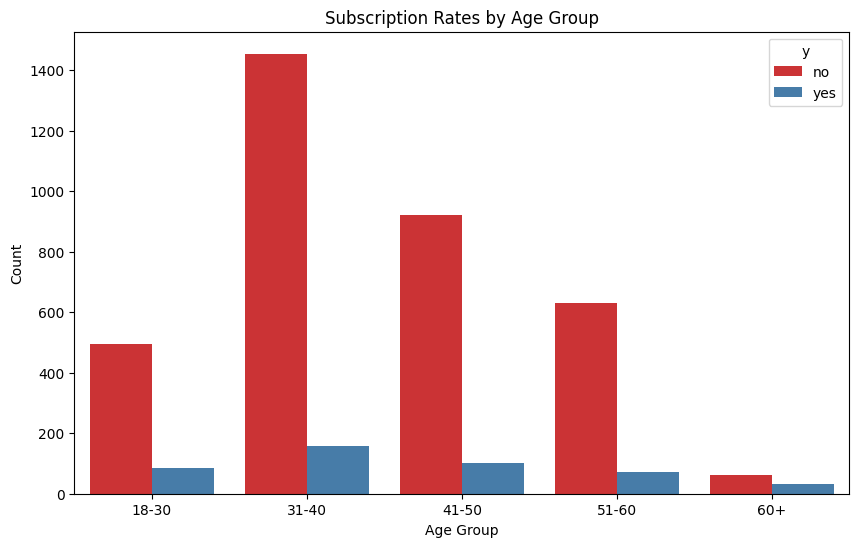

In [19]:
# Age group vs subscription 
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='y', data=data_cleaned, palette='Set1')
plt.title('Subscription Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


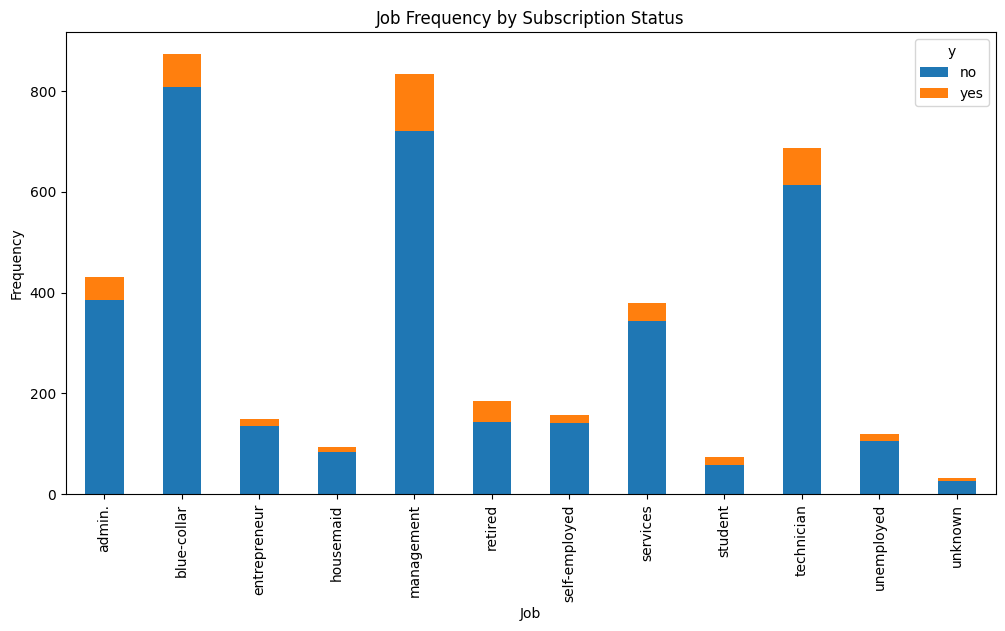

In [20]:
# Crosstab to aggregate data
job_sub_ct = pd.crosstab(data_cleaned['job'], data_cleaned['y'])

# Stacked bar chart
job_sub_ct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Frequency by Subscription Status')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()



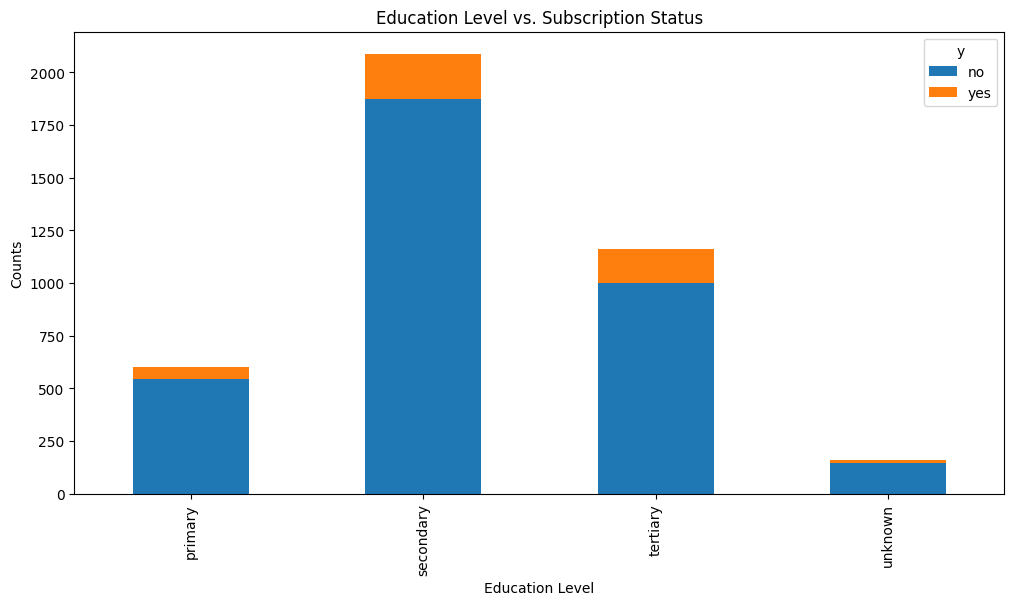

In [21]:
# Create a cross-tabulation
education_sub_ct = pd.crosstab(data_cleaned['education'], data_cleaned['y'])

# Plot
education_sub_ct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Education Level vs. Subscription Status')
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.show()


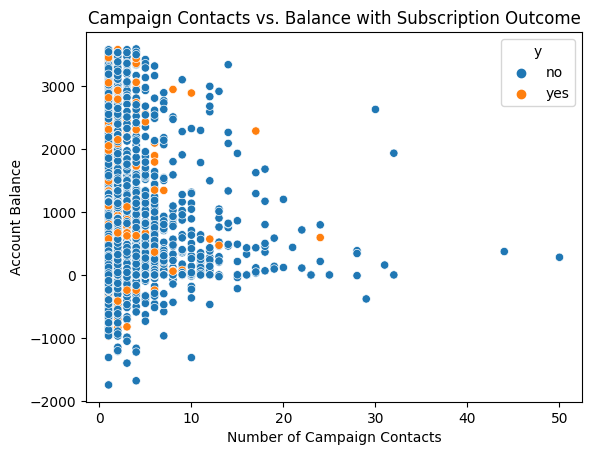

In [22]:
# Campaign Contacts vs Balance 
sns.scatterplot(x='campaign', y='balance', hue='y', data=data_cleaned)
plt.title('Campaign Contacts vs. Balance with Subscription Outcome')
plt.xlabel('Number of Campaign Contacts')
plt.ylabel('Account Balance')
plt.show()


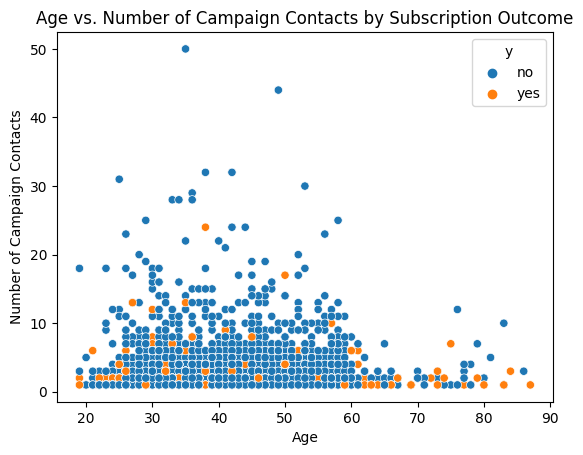

In [23]:
# number of contacts based on age and subscription
sns.scatterplot(x='age', y='campaign', hue='y', data=data_cleaned)
plt.title('Age vs. Number of Campaign Contacts by Subscription Outcome')
plt.xlabel('Age')
plt.ylabel('Number of Campaign Contacts')
plt.show()


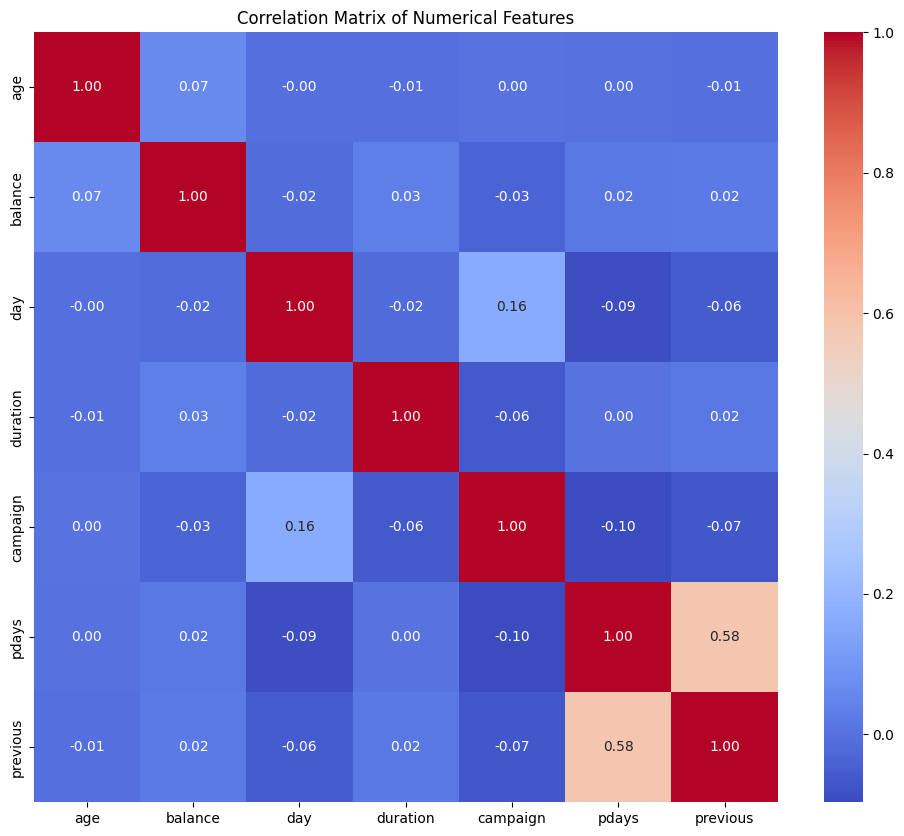

In [24]:
# Select numerical columns including engineered ones
numerical_data1 = data_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_data1.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


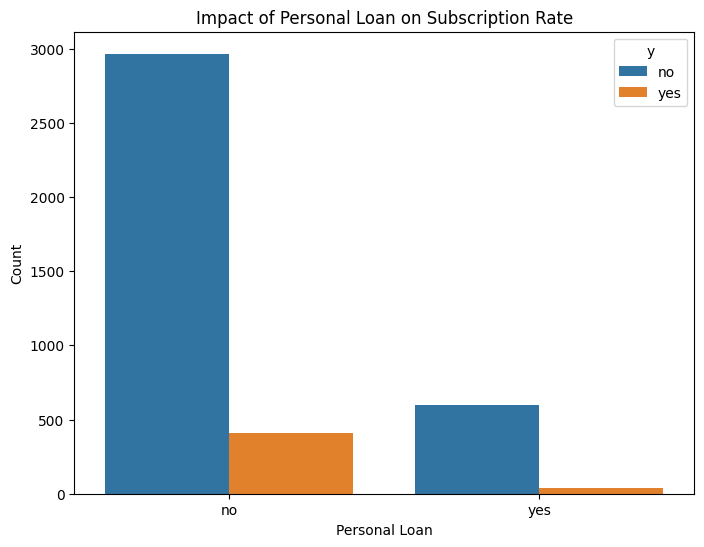

In [25]:
# impact of personal loan 
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='y', data=data_cleaned)
plt.title('Impact of Personal Loan on Subscription Rate')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

# Multi-Variate Analysis

/tmp/ipykernel_33/659975208.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(x='job', hue='education', data=data_cleaned[data['y'] == 'yes'])


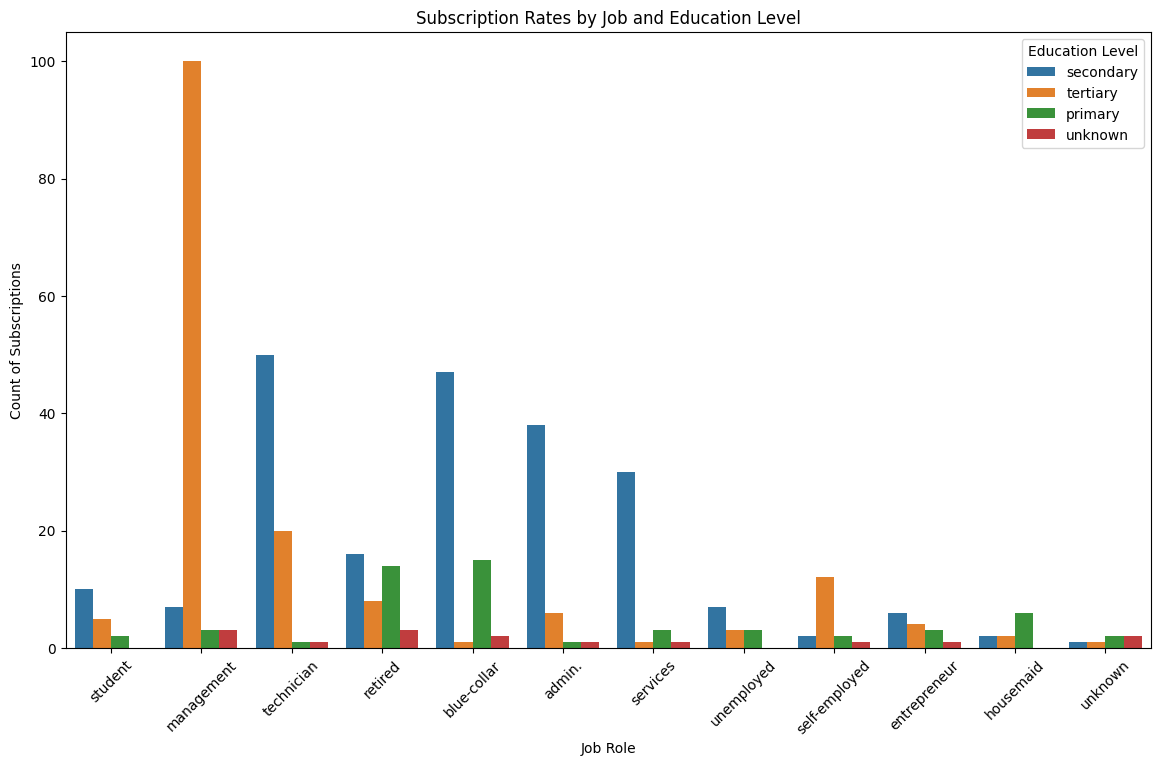

In [26]:
# Create a clustered bar chart
plt.figure(figsize=(14, 8))
sns.countplot(x='job', hue='education', data=data_cleaned[data['y'] == 'yes'])
plt.title('Subscription Rates by Job and Education Level')
plt.xlabel('Job Role')
plt.ylabel('Count of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

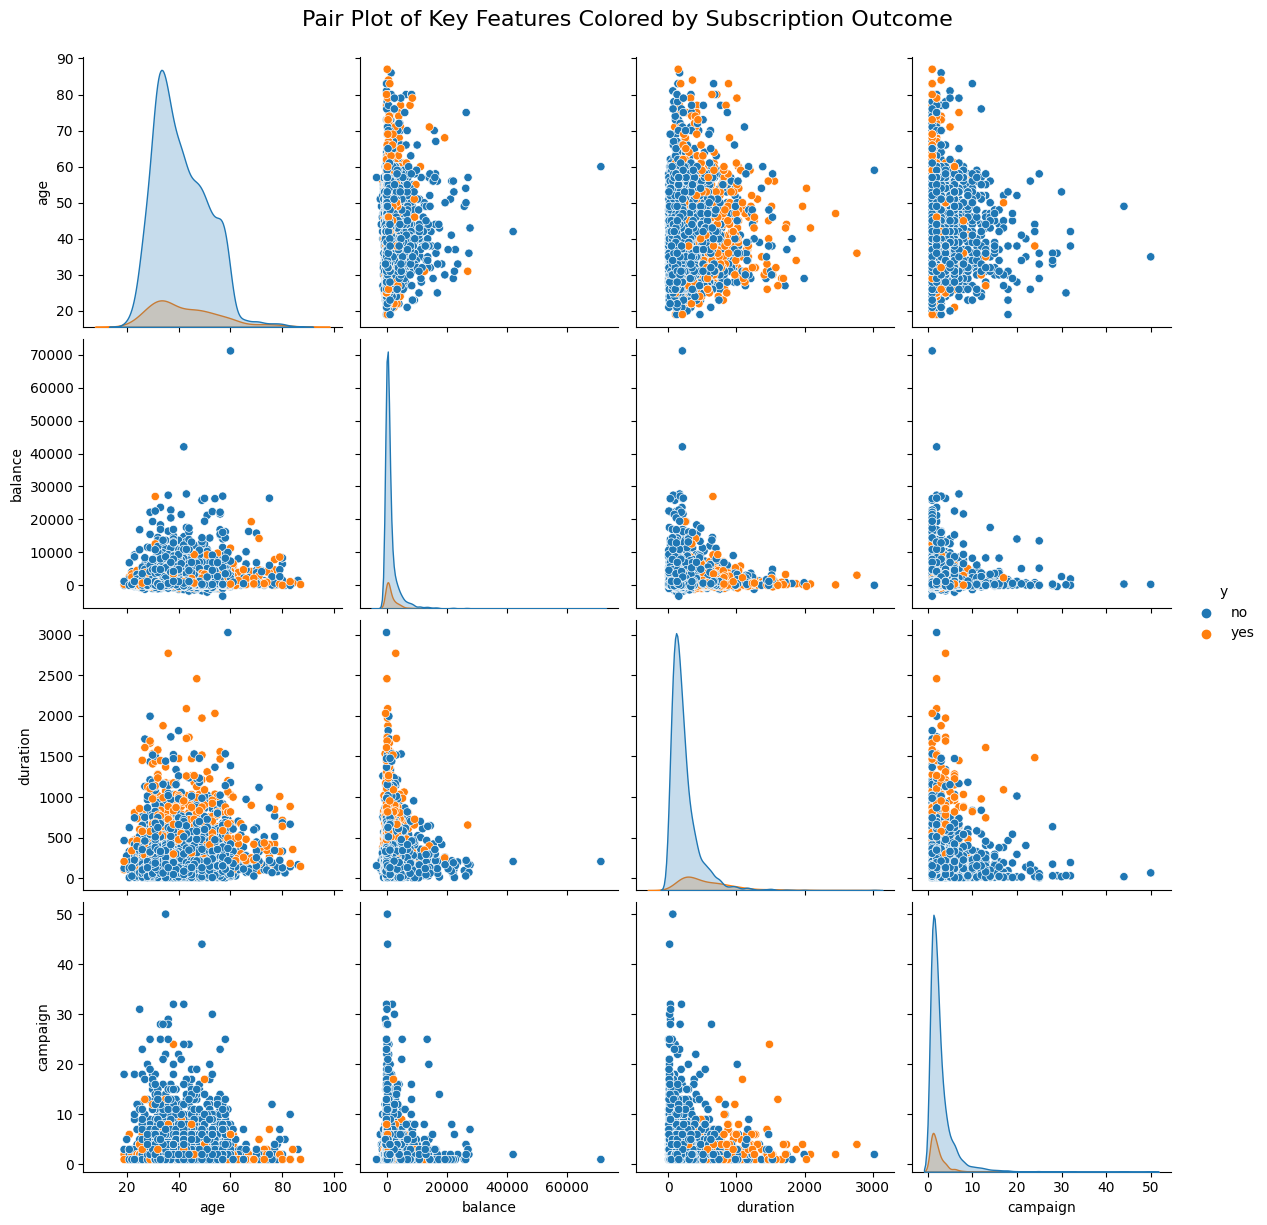

In [27]:
# Selecting a subset of features for clarity
features = ['age', 'balance', 'duration', 'campaign', 'y']

sns.pairplot(data[features], hue='y', height=3, aspect=1)
plt.suptitle('Pair Plot of Key Features Colored by Subscription Outcome', size=16, y=1.02)
plt.show()

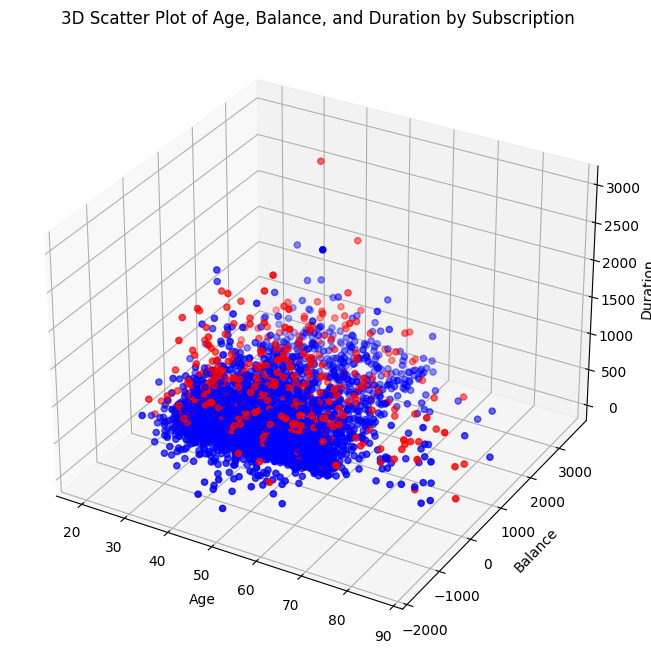

In [28]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'yes':'red', 'no':'blue'}

# 3d scatter plot
ax.scatter(data_cleaned['age'], data_cleaned['balance'], data_cleaned['duration'], c=data_cleaned['y'].map(colors), marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Duration')
ax.set_title('3D Scatter Plot of Age, Balance, and Duration by Subscription')

plt.show()


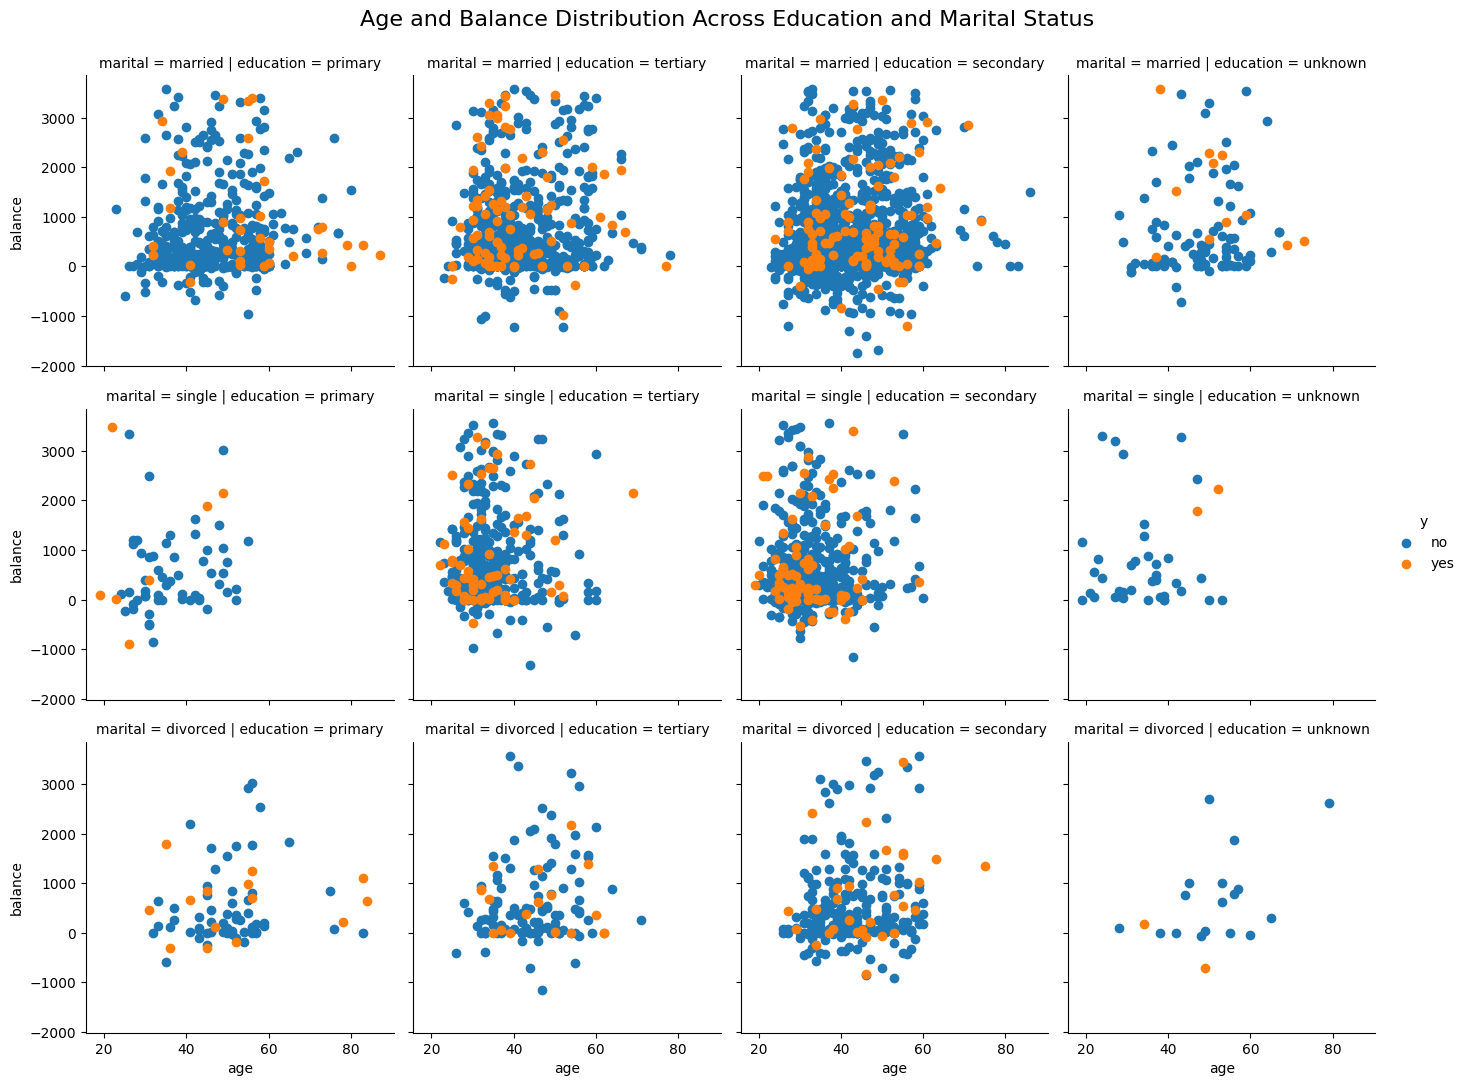

In [29]:
# Age and Bank Balance distribution based on Education Level & Marital Status

g = sns.FacetGrid(data_cleaned, col='education', row='marital', hue='y', height=3.5)
g.map(plt.scatter, 'age', 'balance').add_legend()
g.fig.suptitle('Age and Balance Distribution Across Education and Marital Status', size=16, y=1.03)
plt.show()


# Building the Models

In [30]:
# Importing the necessary libraries once again
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Preprocessing Data for Models

In [31]:
# Preprocessing Data before model 

# Define target and feature matrix
X = data_cleaned.drop('y', axis=1)
y = data_cleaned['y'].map({'yes': 1, 'no': 0})  # binary encoding

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create preprocessing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Splitting Dataframe into test and train set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Creating Pipelines

In [33]:
# Logistic Regression Pipeline
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Random Forest Pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Gradient Boosting Machine Pipeline
pipeline_gbm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(random_state=42))])

# Support Vector Machine Pipeline
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

# Neural Network Pipeline
pipeline_nn = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(random_state=42))])


# Fitting & Evaluating Models

In [34]:
# List of pipelines for ease of iteration
pipelines = [pipeline_lr, pipeline_rf, pipeline_gbm, pipeline_svm, pipeline_nn]
pipeline_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network']

# Dictionary to hold model scores
model_scores = {}

# Train each of the models
for pipe, name in zip(pipelines, pipeline_names):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    model_scores[name] = score
    print(f"{name} model accuracy: {score:.4f}")
    print(classification_report(y_test, y_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model accuracy: 0.9054
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       717
           1       0.61      0.33      0.42        86

    accuracy                           0.91       803
   macro avg       0.77      0.65      0.69       803
weighted avg       0.89      0.91      0.89       803

Random Forest model accuracy: 0.8966
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       717
           1       0.55      0.21      0.30        86

    accuracy                           0.90       803
   macro avg       0.73      0.59      0.62       803
weighted avg       0.87      0.90      0.88       803

Gradient Boosting model accuracy: 0.8991
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       717
           1       0.54      0.41      0.46        86

    accuracy                           0.90       803
   macr

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# This is the End of the notebook , if you liked it , go ahead and give it an upvote